# Machine Learning for NLP

Now, we will explore how to use Machine Learning for NLP such as Topic Modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pyLDAvis, pyLDAvis.sklearn

%matplotlib inline

In [2]:
df = pd.read_csv("./../assets/data_large_clean.csv", index_col = 0)
print(f"Dataframe shape:\t{df.shape}")
df.head()

Dataframe shape:	(33727, 11)


,city,searched_zipcode,url,content,posting_date,education,n_photos,availability,region,type of employment,clean_content
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...",2019-08-27 11:31,some college,0,['weekdays'],elpaso,outbound-retention-specialist,"aside from word of mouth or face to face , col..."
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/best-resum...,Looking for a new job and no respond from the ...,2019-08-07 22:59,bachelors,0,['weekends'],elpaso,best-resume-in-town-from-utep-technical,looking for a new job and no respond from the ...
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,2019-08-17 08:25,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda...",elpaso,looking-for-new-career-move-you-need,i do best resumes in town.. i am technical wri...
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/job-needed...,Well I'm a 24 year old female just lost my job...,2019-09-04 13:20,some college,1,"['evenings', 'mornings', 'overnight', 'weekday...",elpaso,job-needed,well i'm a 24 year old female just lost my job...
4,ElPaso,79936,https://lascruces.craigslist.org/res/d/caregiv...,Caregiver available immediately. 5 years hospi...,2019-09-03 09:47,bachelors,0,"['afternoons', 'evenings', 'mornings', 'overni...",lascruces,caregiver,caregiver available immediately. 5 years hospi...


Remove unneccesary rows and duplicate rows.

In [3]:
df.drop(columns = ['searched_zipcode', 'url', 'region', 'type of employment', 'content'], inplace = True)
df.drop_duplicates(subset = 'clean_content', keep = 'first', inplace = True)
print(f"Dataframe shape:\t{df.shape}")
df.head()

Dataframe shape:	(11112, 6)


,city,posting_date,education,n_photos,availability,clean_content
0,ElPaso,2019-08-27 11:31,some college,0,['weekdays'],"aside from word of mouth or face to face , col..."
1,ElPaso,2019-08-07 22:59,bachelors,0,['weekends'],looking for a new job and no respond from the ...
2,ElPaso,2019-08-17 08:25,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda...",i do best resumes in town.. i am technical wri...
3,ElPaso,2019-09-04 13:20,some college,1,"['evenings', 'mornings', 'overnight', 'weekday...",well i'm a 24 year old female just lost my job...
4,ElPaso,2019-09-03 09:47,bachelors,0,"['afternoons', 'evenings', 'mornings', 'overni...",caregiver available immediately. 5 years hospi...


## Topic Modelling
### Latent Dirichlet Allocation (LDA)
The idea is each word contributes to the likelihood of a document to be of a certain topic.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
count = CountVectorizer(analyzer = 'word',
                        stop_words = 'english',
                        max_features = 5000)

lda = LatentDirichletAllocation(n_components = 20,
                                learning_method = 'online',
                                random_state = 20,
                                verbose = 1,
                                n_jobs = -1)

In [6]:
vect_data = count.fit_transform(df['clean_content'])

In [7]:
lda_data = lda.fit_transform(vect_data)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [8]:
text_2_idx = count.vocabulary_
idx_2_text = {idx:text for text, idx in text_2_idx.items()}

In [9]:
topic_keyword_dict = {}
for topic_idx in range(lda_data.shape[1]):
    topic_keywords = []
    for word_idx in lda.components_[topic_idx].argsort()[::-1][:10]:
        topic_keywords.append(idx_2_text[word_idx])
    print(f"Topic {topic_idx}:\n\t{' '.join(topic_keywords)}")
    topic_keyword_dict[topic_idx] = ' '.join(topic_keywords)

Topic 0:
	repair systems install windows software installation network security electrical computer
Topic 1:
	english school spanish bilingual education university student teaching tutoring language
Topic 2:
	work time experience available looking years hours seeking job resume
Topic 3:
	driver driving truck class cdl license drive record info clean
Topic 4:
	medical il technical support patients patient senior health data dallas
Topic 5:
	customers new insurance customer service daily calls company information office
Topic 6:
	work looking job need just help jobs time hard contact
Topic 7:
	care home caregiver personal live light housekeeping health private available
Topic 8:
	days hours children week 00 yrs hour 30 10 exp
Topic 9:
	contact experience years info looking work time available free thank
Topic 10:
	painting home cleaning plumbing work drywall repair info repairs contact
Topic 11:
	construction work commercial experience residential projects project company site building
T

We can then infer topics from the words that contribute the most to each topic such as:

- Topic 0  : Cooking
- Topic 1  : Caregiver
- Topic 2  : Management
- Topic 3  : Jobs in Las Vegas
- Topic 4  : Truck driving
- etc...

In [10]:
df['topic'] = [row.argsort()[-1] for row in lda_data]

In [11]:
df.loc[df['topic'] == 19].head()

,city,posting_date,education,n_photos,availability,clean_content,topic
19,ElPaso,2019-07-14 14:34,some college,0,"['afternoons', 'evenings', 'mornings', 'weekda...",i have a fully equipped home office and do bot...,19
33,ElPaso,2019-08-02 13:31,associates,1,"['afternoons', 'evenings', 'mornings', 'weeken...",contact pug's graphics for all your custom app...,19
112,LosAngeles,2019-08-23 15:31,masters,0,"['weekdays', 'weekends']","hello,. i am web designer/developer who specia...",19
122,LosAngeles,2019-08-06 15:51,some college,0,"['weekdays', 'weekends']",i'm available for all types of work: part-time...,19
127,LosAngeles,2019-09-05 10:29,associates,0,"['afternoons', 'evenings', 'mornings', 'weekda...",i have over 20+ years of administrative assist...,19


### pyLDAvis

In [12]:
# Setup to run in Jupyter notebook
pyLDAvis.enable_notebook()

# Create the visualization, be sure to sort_topics=False to keep the same order as above, that's important if we want to try and label
vis = pyLDAvis.sklearn.prepare(lda, vect_data, count, sort_topics=False, mds='mmds')

# Export as a standalone HTML web page
pyLDAvis.save_html(vis, 'lda_vis.html')

# Let's view it!
display(vis)

/Users/princemallari/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.377304  0.028076       1        1  3.196962
1     -0.490305  0.193249       2        1  1.377316
2     -0.063666 -0.219578       3        1  5.028679
3     -0.106123 -0.469407       4        1  1.772848
4      0.021803  0.472745       5        1  2.739232
5     -0.236919  0.241128       6        1  4.252946
6     -0.204077 -0.279652       7        1  8.308667
7     -0.382784 -0.232031       8        1  4.295926
8      0.153694 -0.471832       9        1  1.689706
9      0.024656 -0.178444      10        1  7.505170
10     0.263350 -0.293924      11        1  4.720879
11     0.149802  0.037298      12        1  5.216714
12    -0.039505  0.220516      13        1  5.990142
13     0.117050  0.291246      14        1  9.066698
14    -0.155449  0.342290      15        1  9.048707
15    -0.130842 -0.045658      16        1  9.675341
16     0.227627  0.315139      17        1  6.757259
17     0.391112 -0.168472      18        1  3.098160
18     0.477578  0.038640      19        1  2.003570
19     0.360302  0.178671      20        1  4.255079, topic_info=     Category         Freq        Term        Total  loglift  logprob
2672  Default  5596.000000     looking  5596.000000  30.0000  30.0000
4943  Default  9622.000000        work  9622.000000  29.0000  29.0000
767   Default  1971.000000        care  1971.000000  28.0000  28.0000
1077  Default  4813.000000     contact  4813.000000  27.0000  27.0000
3940  Default  2746.000000       sales  2746.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
3523  Topic20   258.430222     project  1491.128840   1.4044  -4.7635
1559  Topic20   257.008955       email  1965.945873   1.1224  -4.7690
3497  Topic20   201.197974  production   744.430013   1.8487  -5.0139
4063  Topic20   185.305065    services  2099.905505   0.7294  -5.0961
1717  Topic20   174.386863  experience  6849.953117  -0.5137  -5.1569

[1361 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.005520       00
0         8  0.007361       00
0         9  0.734216       00
0        11  0.250259       00
1         3  0.102649      000
...     ...       ...      ...
4994     19  0.647686  youtube
4994     20  0.349314  youtube
4995      8  0.989974       yr
4996      9  0.977267      yrs
4996     11  0.018489      yrs

[3566 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### TSNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
new_york_data = df.loc[df['city'] == 'NewYork'].drop_duplicates(subset = 'clean_content',
                                                               keep = 'first')

In [15]:
count = CountVectorizer(analyzer = 'word',
                        stop_words = 'english')

tsne = TSNE(n_components = 2,
            metric = 'cosine',
            verbose = 1,
            random_state = 42)

In [16]:
tsne_feature = count.fit_transform(new_york_data['clean_content'])
tsne_feature = tsne.fit_transform(tsne_feature.todense())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2720 samples in 0.013s...
[t-SNE] Computed neighbors for 2720 samples in 0.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2720
[t-SNE] Computed conditional probabilities for sample 2000 / 2720
[t-SNE] Computed conditional probabilities for sample 2720 / 2720
[t-SNE] Mean sigma: 0.190171
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.278984
[t-SNE] KL divergence after 1000 iterations: 2.329146


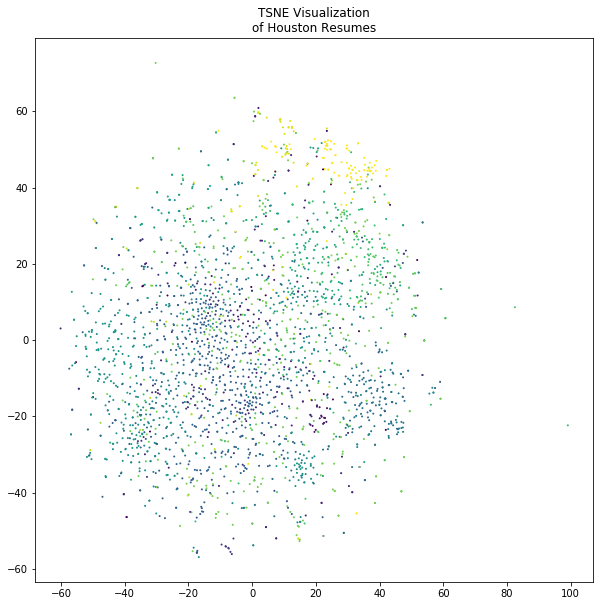

In [17]:
plt.figure(figsize = (10, 10))
plt.scatter(tsne_feature[:,0], tsne_feature[:,1], 
            s = 1, c = new_york_data['topic'])
plt.title("TSNE Visualization\nof Houston Resumes")
plt.show()

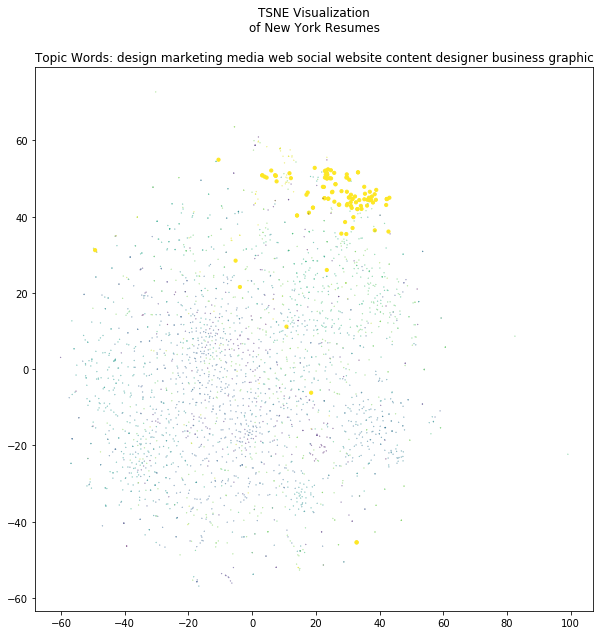

In [18]:
highlight_topic = 19
sizes = [10 if a == highlight_topic else 0.05 for a in new_york_data['topic']]
plt.figure(figsize = (10, 10))
plt.scatter(tsne_feature[:,0], tsne_feature[:,1], 
            s = sizes, c = new_york_data['topic'])
plt.title(f"TSNE Visualization\nof New York Resumes\n\nTopic Words: {topic_keyword_dict[highlight_topic]}")
plt.show()